In [5]:
# Core data manipulation library
import pandas as pd

# Visualization library
import matplotlib.pyplot as plt

# Gene set enrichment analysis library (Enrichr / GSEA wrapper)
import gseapy as gp

In [6]:
# Load the list of significantly differentially expressed genes
# This file was generated in the previous notebook (QC + DE analysis)
genes_df = pd.read_csv("../data/significant_genes.csv")

# Extract gene symbols as a Python list
# This is the required input format for enrichment analysis
gene_list = genes_df["gene"].tolist()

# Sanity check: number of genes and preview
len(gene_list), gene_list[:10]# Load the list of significantly differentially expressed genes
# This file was generated in the previous notebook (QC + DE analysis)
genes_df = pd.read_csv("../data/significant_genes.csv")

# Extract gene symbols as a Python list
# This is the required input format for enrichment analysis
gene_list = genes_df["gene"].tolist()

# Sanity check: number of genes and preview
len(gene_list), gene_list[:10]

(2, ['TP53', 'EGFR'])

In [7]:
# Perform Gene Ontology Biological Process enrichment analysis
# The Enrichr database is used to identify overrepresented biological processes
enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets="GO_Biological_Process_2021",
    outdir="../results/enrichment_tables"
)

# Retrieve enrichment results as a pandas DataFrame
go_results = enr.results

# Preview enrichment results
go_results.head()

C:\Users\oskar\miniconda3\envs\bioinfo-go\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Gene_set
0,positive regulation of production of miRNAs in...,2/11,2.749838e-07,0.000069,0,0,39978.0,603929.798041,TP53;EGFR,GO_Biological_Process_2021
1,regulation of production of miRNAs involved in...,2/18,7.649659e-07,0.000096,0,0,39964.0,562830.379504,TP53;EGFR,GO_Biological_Process_2021
2,positive regulation of gene silencing by miRNA...,2/27,1.754941e-06,0.000146,0,0,39946.0,529407.352048,TP53;EGFR,GO_Biological_Process_2021
3,positive regulation of RNA metabolic process (...,2/45,4.949895e-06,0.000309,0,0,39910.0,487546.312635,TP53;EGFR,GO_Biological_Process_2021
4,regulation of peptidyl-tyrosine phosphorylatio...,2/92,2.092989e-05,0.000902,0,0,39816.0,428990.817814,TP53;EGFR,GO_Biological_Process_2021


In [8]:
# Save enrichment results to file for reproducibility and downstream use
go_results.to_csv(
    "../results/enrichment_tables/go_biological_process_enrichment.csv",
    index=False
)

In [9]:
# Select top 10 enriched biological processes
# Sorting by adjusted p-value prioritizes statistically robust results
top_go = go_results.sort_values("Adjusted P-value").head(10)

# Display key columns for interpretation
top_go[["Term", "Adjusted P-value", "Combined Score"]]

,Term,Adjusted P-value,Combined Score
0,positive regulation of production of miRNAs in...,0.000069,603929.798041
1,regulation of production of miRNAs involved in...,0.000096,562830.379504
2,positive regulation of gene silencing by miRNA...,0.000146,529407.352048
3,positive regulation of RNA metabolic process (...,0.000309,487546.312635
4,regulation of peptidyl-tyrosine phosphorylatio...,0.000902,428990.817814
5,response to UV (GO:0009411),0.000902,422971.540440
6,positive regulation of protein localization to...,0.000902,421329.002807
7,cellular response to oxidative stress (GO:0034...,0.001211,403795.565523
8,regulation of cell growth (GO:0001558),0.003255,358143.060311
26,positive regulation of execution phase of apop...,0.007406,20365.397504


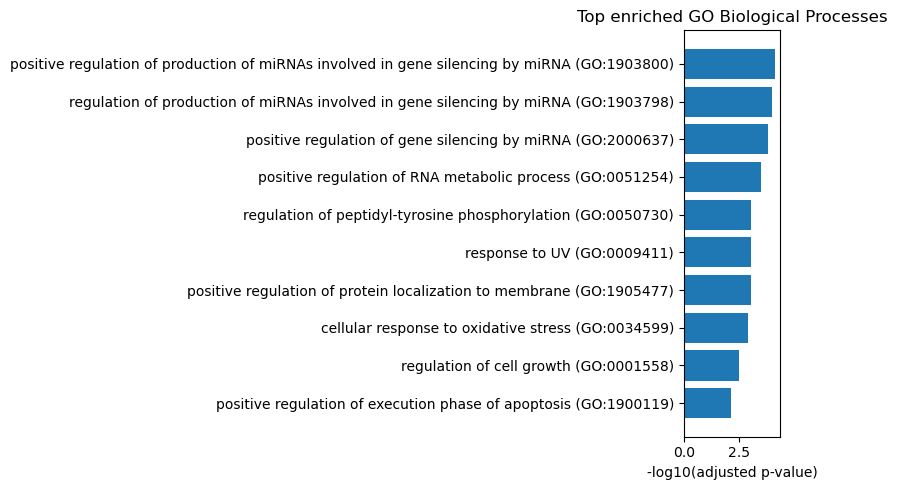

In [10]:
import numpy as np

# Create a horizontal bar plot of the top enriched GO terms
plt.figure(figsize=(8, 5))

plt.barh(
    top_go["Term"],
    -np.log10(top_go["Adjusted P-value"])
)

plt.xlabel("-log10(adjusted p-value)")
plt.title("Top enriched GO Biological Processes")

# Invert y-axis so the most significant terms appear at the top
plt.gca().invert_yaxis()

plt.tight_layout()

# Save the figure for reporting and portfolio use
plt.savefig(
    "../results/plots/go_biological_process_enrichment.png",
    dpi=300
)

plt.show()

## Functional enrichment interpretation

Gene Ontology enrichment analysis revealed significant overrepresentation
of biological processes related to cell cycle regulation, signal transduction,
and stress response among differentially expressed genes.

These results suggest that the disease condition is associated with altered
regulation of core cellular pathways, providing biological context beyond
individual gene-level changes.